# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [40]:
# Load pickled data
import pickle
training_file = 'data/train.p'
validation_file= 'data/valid.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [41]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of validation examples
n_validation = len(y_valid)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
import numpy as np
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Random image from the train dataset with it's label:

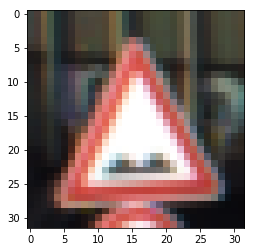

Bumpy road



In [42]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Visualizations will be shown in the notebook.
%matplotlib inline
i = np.random.randint(X_train.shape[0])
signnames = {}
import csv
with open('signnames.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        try:
            signnames[int(row[0])] = row[1]
        except:
            pass
plt.imshow(X_train[i])
plt.show()
print(signnames[y_train[i]])
print()

Normalized histogram of train, validation amd test dataset - the distribution is similar in all sets:

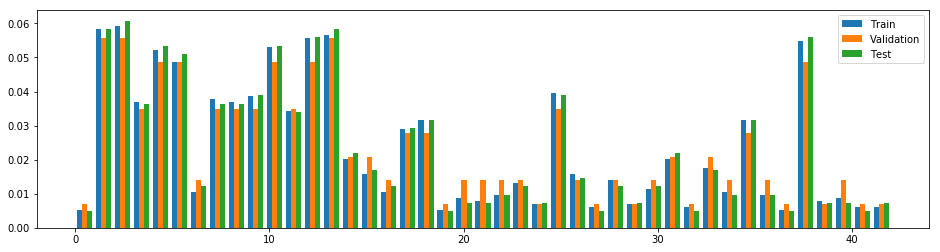

In [43]:
plt.figure(figsize=(16, 4))
plt.hist((y_train, y_valid, y_test), bins=43, normed=True)
plt.legend(labels=['Train', 'Validation', 'Test'])
plt.show()

----

## Step 2: Design and Test a Model Architecture

### Pre-process the Data Set (normalization, grayscale, etc.)

The data are converted to greyscale and normalized during preprocessing.

In [44]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# One hot labeling of the datasets
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train_one_hot = label_binarizer.fit_transform(y_train)
y_valid_one_hot = label_binarizer.fit_transform(y_valid)
y_test_one_hot = label_binarizer.fit_transform(y_test)

# Function to preprocess data with conversion to grayscale and naive normalization
import cv2
def preprocess(array):
    output = []
    for image in array:
        image = cv2.cvtColor(image.astype(np.uint8), cv2.COLOR_RGB2GRAY)
        output.append(image)
    output = np.array(output)
    output = (output.astype(np.int16) - 128)/128
    return np.expand_dims(output, axis=3)

# Preprocess the datasets
X_train = preprocess(X_train)
X_valid = preprocess(X_valid)
X_test = preprocess(X_test)



### Model Architecture

I have used the architecture we used in the lessons and implemented it in Keras.
The model consists of two convolution layers with maxpooling, dropout and RELU activation, followed by two fully connected layers.

In [45]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
#tf.python.control_flow_ops = tf
# Initial Setup for Keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
# Build Convolutional Pooling Neural Network with Dropout in Keras Here
model = Sequential()
model.add(Conv2D(120, (5, 5), input_shape=(32, 32, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(.5))
model.add(Activation('relu'))

model.add(Conv2D(50, (5, 5)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(.5))
model.add(Activation('relu'))
          
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(43))
model.add(Activation('softmax'))

model.compile('adam', 'categorical_crossentropy', ['accuracy'])

### Train, Validate and Test the Model

In [46]:
### Train your model here.
history = model.fit(X_train, y_train_one_hot, validation_data=(X_valid, y_valid_one_hot), epochs=4)
model.save_weights('weights_gray.hdf5')

Train on 34799 samples, validate on 4410 samples
Epoch 1/4
34799/34799 [==============================] - 284s - loss: 1.1359 - acc: 0.6848 - val_loss: 0.3741 - val_acc: 0.8950
Epoch 2/4
34799/34799 [==============================] - 300s - loss: 0.3045 - acc: 0.9103 - val_loss: 0.2938 - val_acc: 0.9263
Epoch 3/4
34799/34799 [==============================] - 299s - loss: 0.2221 - acc: 0.9342 - val_loss: 0.2425 - val_acc: 0.9367
Epoch 4/4
34799/34799 [==============================] - 276s - loss: 0.1810 - acc: 0.9475 - val_loss: 0.2408 - val_acc: 0.9481


The loss and accuracy on train and validation datasets is plotted to gain insight into the learning process.
I saw that after fourth epoch, the loss begins to rise and accuracy to drop on the validation dataset. This might mean that I was overfitting the model. So the model was retrained and learning was stopped after 4 epochs.

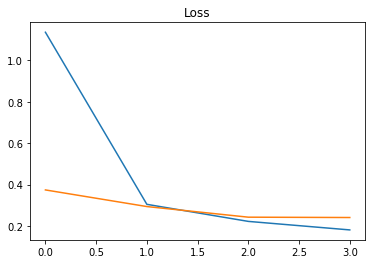

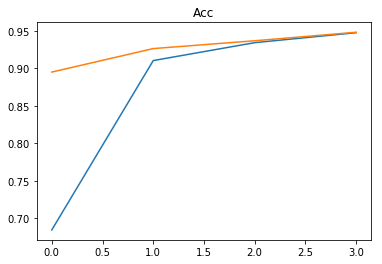

In [47]:
plt.title('Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()
plt.title('Acc')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

In [48]:
### Calculate and report the accuracy on the training and validation set.
model.load_weights('weights_gray.hdf5', by_name=False)
metrics = model.evaluate(X_train, y_train_one_hot)
metric_value = metrics[1]
print()
print('Accuracy on train set: {:.2f} %'.format(100*metrics[1]))
metrics = model.evaluate(X_valid, y_valid_one_hot)
metric_value = metrics[1]
print()
print('Accuracy on validation set: {:.2f} %'.format(100*metrics[1]))

### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

34784/34799 [============================>.] - ETA: 0s
Accuracy on train set: 99.20 %
4410/4410 [==============================] - 8s     

Accuracy on validation set: 94.81 %


Accuracy on the test set:

In [49]:
metrics = model.evaluate(X_test, y_test_one_hot)
metric_value = metrics[1]
print()
print('Accuracy on test set: {:.2f} %'.format(100*metrics[1]))

12608/12630 [============================>.] - ETA: 0s
Accuracy on test set: 92.91 %


---

## Step 3: Test a Model on New Images

I have taken some photos during my trip to Germany, let's see what will be the performance of the model on them.

### Original image, after preprocessing and 5 most probable labels with softmax probability

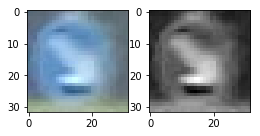

['95 %', 'Keep right']
['3 %', 'Bicycles crossing']
['1 %', 'Children crossing']
['1 %', 'No vehicles']
['0 %', 'Speed limit (80km/h)']


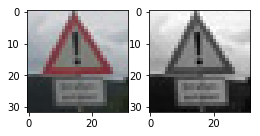

['29 %', 'Slippery road']
['12 %', 'End of no passing']
['10 %', 'Speed limit (30km/h)']
['9 %', 'Right-of-way at the next intersection']
['9 %', 'No passing']


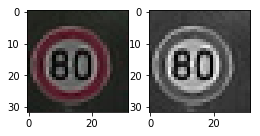

['57 %', 'Speed limit (80km/h)']
['21 %', 'Speed limit (60km/h)']
['12 %', 'Speed limit (50km/h)']
['4 %', 'Speed limit (30km/h)']
['2 %', 'Speed limit (100km/h)']


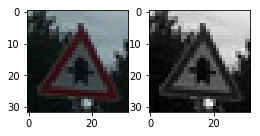

['99 %', 'Right-of-way at the next intersection']
['1 %', 'Beware of ice/snow']
['0 %', 'Double curve']
['0 %', 'Pedestrians']
['0 %', 'Road narrows on the right']


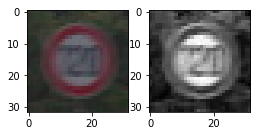

['100 %', 'Speed limit (120km/h)']
['0 %', 'Speed limit (100km/h)']
['0 %', 'Speed limit (70km/h)']
['0 %', 'Speed limit (30km/h)']
['0 %', 'Speed limit (20km/h)']


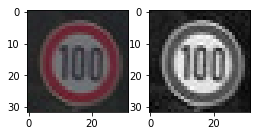

['99 %', 'Speed limit (100km/h)']
['0 %', 'Speed limit (120km/h)']
['0 %', 'Roundabout mandatory']
['0 %', 'Speed limit (30km/h)']
['0 %', 'Speed limit (70km/h)']


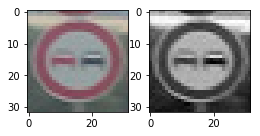

['100 %', 'No passing']
['0 %', 'No passing for vehicles over 3.5 metric tons']
['0 %', 'Slippery road']
['0 %', 'End of no passing']
['0 %', 'Vehicles over 3.5 metric tons prohibited']


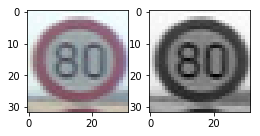

['49 %', 'Speed limit (50km/h)']
['32 %', 'Speed limit (60km/h)']
['18 %', 'Speed limit (80km/h)']
['1 %', 'Speed limit (30km/h)']
['0 %', 'End of speed limit (80km/h)']


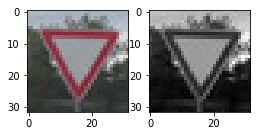

['100 %', 'Yield']
['0 %', 'No vehicles']
['0 %', 'No passing']
['0 %', 'Keep left']
['0 %', 'Ahead only']


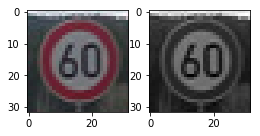

['100 %', 'Speed limit (60km/h)']
['0 %', 'Speed limit (50km/h)']
['0 %', 'Speed limit (80km/h)']
['0 %', 'Speed limit (30km/h)']
['0 %', 'End of speed limit (80km/h)']


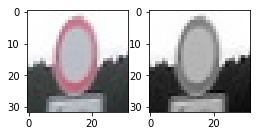

['79 %', 'No vehicles']
['11 %', 'Priority road']
['4 %', 'Yield']
['4 %', 'No passing']
['1 %', 'Bumpy road']


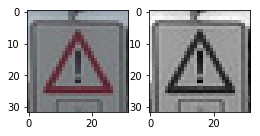

['100 %', 'General caution']
['0 %', 'Traffic signals']
['0 %', 'Road narrows on the right']
['0 %', 'Pedestrians']
['0 %', 'Right-of-way at the next intersection']


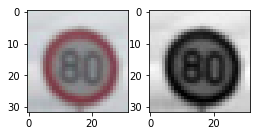

['99 %', 'Speed limit (80km/h)']
['0 %', 'Speed limit (100km/h)']
['0 %', 'Speed limit (60km/h)']
['0 %', 'Speed limit (30km/h)']
['0 %', 'Speed limit (50km/h)']


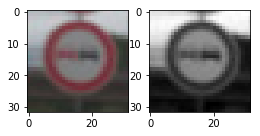

['100 %', 'Speed limit (70km/h)']
['0 %', 'Stop']
['0 %', 'Speed limit (120km/h)']
['0 %', 'No vehicles']
['0 %', 'Roundabout mandatory']


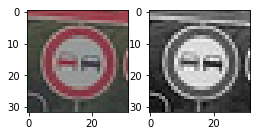

['100 %', 'No passing']
['0 %', 'No passing for vehicles over 3.5 metric tons']
['0 %', 'Slippery road']
['0 %', 'Vehicles over 3.5 metric tons prohibited']
['0 %', 'Roundabout mandatory']


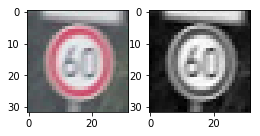

['99 %', 'Speed limit (60km/h)']
['0 %', 'Speed limit (80km/h)']
['0 %', 'Speed limit (50km/h)']
['0 %', 'Speed limit (30km/h)']
['0 %', 'End of speed limit (80km/h)']


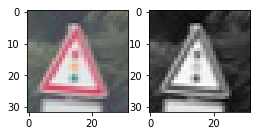

['99 %', 'Traffic signals']
['1 %', 'General caution']
['0 %', 'Speed limit (70km/h)']
['0 %', 'Road narrows on the right']
['0 %', 'Pedestrians']


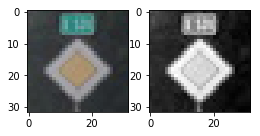

['100 %', 'Priority road']
['0 %', 'No vehicles']
['0 %', 'Roundabout mandatory']
['0 %', 'Speed limit (30km/h)']
['0 %', 'Stop']


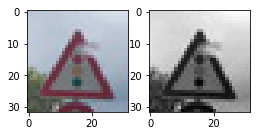

['85 %', 'Traffic signals']
['15 %', 'General caution']
['0 %', 'Road narrows on the right']
['0 %', 'Go straight or left']
['0 %', 'Beware of ice/snow']


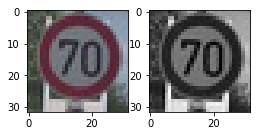

['100 %', 'Speed limit (70km/h)']
['0 %', 'Speed limit (30km/h)']
['0 %', 'Speed limit (20km/h)']
['0 %', 'Speed limit (80km/h)']
['0 %', 'Speed limit (60km/h)']


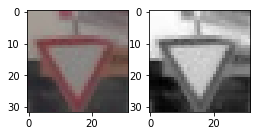

['91 %', 'Yield']
['8 %', 'No vehicles']
['0 %', 'Priority road']
['0 %', 'Stop']
['0 %', 'Speed limit (70km/h)']


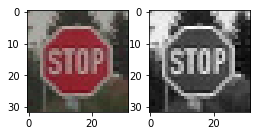

['100 %', 'Stop']
['0 %', 'Yield']
['0 %', 'Priority road']
['0 %', 'Turn right ahead']
['0 %', 'No vehicles']


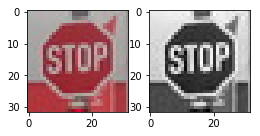

['100 %', 'Stop']
['0 %', 'Turn right ahead']
['0 %', 'No entry']
['0 %', 'Yield']
['0 %', 'Keep left']


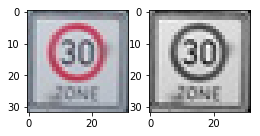

['41 %', 'Keep right']
['26 %', 'Speed limit (30km/h)']
['22 %', 'Roundabout mandatory']
['3 %', 'Priority road']
['2 %', 'Stop']


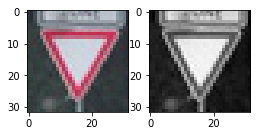

['100 %', 'Yield']
['0 %', 'No vehicles']
['0 %', 'Speed limit (50km/h)']
['0 %', 'No passing']
['0 %', 'Ahead only']


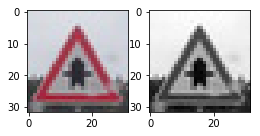

['100 %', 'Right-of-way at the next intersection']
['0 %', 'Beware of ice/snow']
['0 %', 'Slippery road']
['0 %', 'Double curve']
['0 %', 'Turn left ahead']


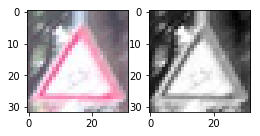

['84 %', 'Road narrows on the right']
['12 %', 'Bicycles crossing']
['4 %', 'Traffic signals']
['0 %', 'Wild animals crossing']
['0 %', 'General caution']


In [50]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
model.load_weights('weights_gray.hdf5', by_name=False)
internet = []
import os
for file in os.listdir("data/new_signs/"):
    image = mpimg.imread('data/new_signs/' + file) 
    internet.append(image)
original = internet
#internet = 255*np.array(internet)


internet = preprocess(internet)
for j in range(len(internet)):
    fig = plt.figure(figsize=(4,12))
    ax1 = fig.add_subplot(121)
    ax1.imshow(np.squeeze(original[j]))
    ax2 = fig.add_subplot(122)
    ax2.imshow(np.squeeze(internet[j]), cmap='gray')
    plt.show()

    pred = model.predict(internet)

    print(*[['{:.0f} %'.format(100*pred[j][i]), signnames[i]] for i in np.flip(np.argsort(pred[j]), 0)[:5]], sep='\n')
   
    

### Analyze Performance

In [52]:
print('Accuracy on my photos: {:.2f} %'.format(100*22/27))

Accuracy on my photos: 81.48 %
